/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


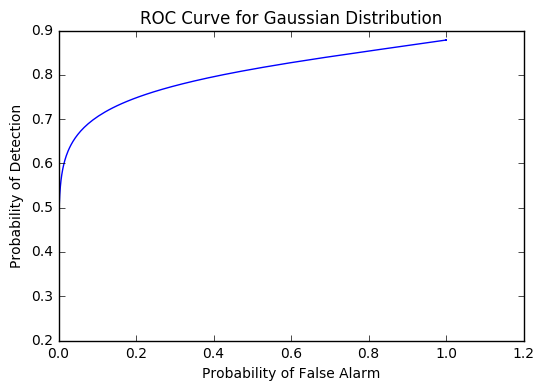

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.optimize import fsolve

fig, ax1 = plt.subplots()
mu = [-1.5,1.5]
var = [1,9]
sig = [math.sqrt(var[0]),math.sqrt(var[1])]

def plot_roccurve(mu,sig):
    x = np.linspace(-10, 10, 200)
    thr = np.linspace(-2,10,200)
    pf = []
    pd = []
    for ind in range(200):
        # Finding the intercets of the loglikelihood threshold.
        f = lambda x:np.log(norm.pdf(x, mu[1], sig[1])) - np.log(norm.pdf(x, mu[0], sig[0])) - thr[ind]
        x0 = fsolve(f,-4)[0]
        x1 = fsolve(f,4)[0]

        #Calculating the probability of false alarm and probability of detection
        pf.append(1-(norm.cdf((x1-mu[0])/sig[0])-norm.cdf(x0-mu[0]/sig[0])))
        pd.append(1-(norm.cdf((x1-mu[1])/sig[1])-norm.cdf(x0-mu[1]/sig[1])))

    ax1.plot(pf,pd)
    plt.xlabel('Probability of False Alarm')
    plt.ylabel('Probability of Detection')
    plt.title('ROC Curve for Gaussian Distribution')
    plt.show()

plot_roccurve(mu,sig)